In [2]:
#minst practice from lecture
#need my own copy of the code for reference. 


#loading data and plotting images. 
#To view a tensor you can't just print it like a normal Python object
#you have to use sess=tf.Session() then sess.run(a) where a is a tensor object
#

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from quiz import get_weights, get_biases, linear

#this loads 3 labels/classes and the training/validation/test sets

def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    #mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(784,)
(28, 28)
[ 0.  1.  0.]


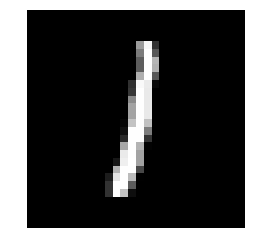

In [20]:
import matplotlib.pyplot as plt
# Visualizations.
%matplotlib inline
import numpy as np

n_labels = 3

features,labels = mnist_features_labels(n_labels)
print (features[0].shape)

print (np.reshape(features[0],(-1,28)).shape)
plt.set_cmap('gray')
plt.axis('off')
plt.imshow(np.reshape(features[0],(-1,28)))
print (labels[0]) #0,1,0 is a 1. lbel matches image


In [ ]:
#we input an image directly into a nn or we use strides of smaller windows. Most of the examples in lecture
#input the entire impage w/using strides. 




In [ ]:
#RELU A relu is used between linear functions to create nonlinear functions


import tensorflow as tf

output = None
hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[1.0, 2.0, 3.0, 4.0], [-1.0, -2.0, -3.0, -4.0], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model
hidden_layer = tf.add(tf.matmul(features,weights[0]),biases[0])
hidden_relu = tf.nn.relu(hidden_layer)
output = tf.add(tf.matmul(hidden_relu,weights[1]),biases[1])


# TODO: Print session results
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(output



In [22]:
#NN from DNN: lecture 
#Loss example

# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
#w = get_weights(n_features, n_labels)
#b = get_biases(n_labels)

# Linear Function xW + b
#logits = linear(features, w, b)

w = tf.Variable(tf.truncated_normal((n_features, n_labels)))
#set the bias to 0, we always set the bias to 0. 
b = tf.Variable(tf.zeros(n_labels))
logits = tf.add(tf.matmul(features,w),b)
# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    # TODO: Initialize session variables
    session.run(tf.global_variables_initializer())
    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Loss: 9.64761734008789


In [9]:
#minst DNN lexture 11/12
#adding epochs
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)
print(mnist.train.images.shape)
print (mnist.train.labels.shape)
learning_rate = 0.001
training_epochs = 500
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])
#creates 1-d vector of 784 from 28x28 image
x_flat = tf.reshape(x, [-1, n_input])

layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        valid_accuracy = sess.run(accuracy,feed_dict={x: mnist.validation.images,y: mnist.validation.labels})
        print('Epoch {:<3} - Validation Accuracy: {}'.format(epoch,valid_accuracy))






Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
(55000, 28, 28, 1)
(55000, 10)
Epoch 0   - Validation Accuracy: 0.40939998626708984
Epoch 1   - Validation Accuracy: 0.5641999840736389
Epoch 2   - Validation Accuracy: 0.6388000249862671
Epoch 3   - Validation Accuracy: 0.6818000078201294
Epoch 4   - Validation Accuracy: 0.7135999798774719
Epoch 5   - Validation Accuracy: 0.7372000217437744
Epoch 6   - Validation Accuracy: 0.756600022315979
Epoch 7   - Validation Accuracy: 0.7739999890327454
Epoch 8   - Validation Accuracy: 0.7825999855995178
Epoch 9   - Validation Accuracy: 0.7900000214576721
Epoch 10  - Validation Accuracy: 0.7975999712944031
Epoch 11  - Validation Accuracy: 0.801800012588501
Epoch 12  - Validation Accuracy: 0.8091999888420105
Epoch 13  - Validation Accuracy: 0.8145999908447266
Epoch 14  - Validation Accuracy: 0.8184000253677368
Epoch 15  - Validation Accuracy:

In [ ]:
#add regularization, there is no code for regularization w/l2 norm 
#dropout

keep_prob = tf.placeholder(tf.float32) # probability to keep units

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])



In [ ]:
#pooling





In [ ]:
#batching 


